In [1]:
import pandas as pd
close_school = pd.read_csv("폐교학교.csv")
close_school

,정보공시 학교코드,학교명,지역,위도,경도,입학생수,학생수,교사수,년도,수업교원 1인당 학생수,폐교가능성년도
0,S010000742,서울논현초등학교,서울특별시 강남구,37.508170,127.026032,26.610,179.210,16.645,2026,10.766597,2026
1,S010000757,서울방현초등학교,서울특별시 서초구,37.476372,126.990178,28.065,175.755,13.420,2026,13.096498,2026
2,S010000778,서울우암초등학교,서울특별시 서초구,37.472296,127.023722,32.750,181.945,17.530,2026,10.379064,2026
3,S010000910,서울남천초등학교,서울특별시 송파구,37.501176,127.150731,33.340,207.070,18.305,2026,11.312210,2026
4,S010000923,서울상일초등학교,서울특별시 강동구,37.547572,127.172662,33.240,164.670,16.240,2026,10.139778,2026
...,...,...,...,...,...,...,...,...,...,...,...
85,S010001762,서울신창초등학교,서울특별시 도봉구,37.636567,127.041855,32.740,207.515,16.650,2030,12.463363,2030
86,S010001770,서울용동초등학교,서울특별시 노원구,37.641085,127.069083,27.865,156.975,16.495,2030,9.516520,2030
87,S010001975,서울대은초등학교,서울특별시 은평구,37.612125,126.925910,33.355,215.765,19.675,2030,10.966455,2030
88,S010002168,서울광장초등학교,서울특별시 광진구,37.548505,127.101058,38.355,224.005,16.510,2030,13.567838,2030


In [2]:
school_info = pd.read_csv("./data/학교기본정보(초)_서울특별시교육청.csv")
school_info[['정보공시 학교코드','학교명','위도','경도']]

,정보공시 학교코드,학교명,위도,경도
0,S000003511,서울교육대학교부설초등학교,37.490739,127.015424
1,S000003563,서울대학교사범대학부설초등학교,37.577791,127.002875
2,S010000737,서울개원초등학교,37.481618,127.058738
3,S010000738,서울개일초등학교,37.486214,127.057742
4,S010000739,서울개포초등학교,37.486805,127.069977
...,...,...,...,...
609,S010006432,서울항동초등학교,37.476731,126.823929
610,S010006433,서울해누리초등학교,37.498364,127.101956
611,S010006476,서울양원숲초등학교,37.608890,127.105540
612,S010006510,서울개현초등학교,37.481026,127.062043


In [3]:
c = pd.read_csv('이미폐교.csv')

In [4]:
# c의 학교코드 목록
codes = c['정보공시 학교코드']

# school_info에서 c에 없는 코드만 필터링
school_info_filtered = school_info[~school_info['정보공시 학교코드'].isin(codes)]
len(school_info_filtered)


606

In [5]:
import numpy as np
# Haversine 함수: 두 위도/경도 사이 거리(m) 계산
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # 지구 반지름 (m)
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

# 반경 500m 내 학교 수를 저장할 리스트
nearby_counts = []

# 지도 초기화

for idx, school in close_school.iterrows():
    lat1, lon1 = school['위도'], school['경도']
    
    # 자기 자신 제외하고 모든 학교와 거리 계산
    distances = school_info_filtered.apply(
        lambda row: haversine(lat1, lon1, row['위도'], row['경도'])
                    if row['정보공시 학교코드'] != school['정보공시 학교코드'] else np.inf,
        axis=1
    )
    
    # 500m 내 학교 수 계산
    nearby_count = (distances <= 500).sum()
    nearby_counts.append(nearby_count)

close_school['500m내_학교수'] = nearby_counts

In [6]:
close_school

,정보공시 학교코드,학교명,지역,위도,경도,입학생수,학생수,교사수,년도,수업교원 1인당 학생수,폐교가능성년도,500m내_학교수
0,S010000742,서울논현초등학교,서울특별시 강남구,37.508170,127.026032,26.610,179.210,16.645,2026,10.766597,2026,0
1,S010000757,서울방현초등학교,서울특별시 서초구,37.476372,126.990178,28.065,175.755,13.420,2026,13.096498,2026,0
2,S010000778,서울우암초등학교,서울특별시 서초구,37.472296,127.023722,32.750,181.945,17.530,2026,10.379064,2026,0
3,S010000910,서울남천초등학교,서울특별시 송파구,37.501176,127.150731,33.340,207.070,18.305,2026,11.312210,2026,0
4,S010000923,서울상일초등학교,서울특별시 강동구,37.547572,127.172662,33.240,164.670,16.240,2026,10.139778,2026,0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,S010001762,서울신창초등학교,서울특별시 도봉구,37.636567,127.041855,32.740,207.515,16.650,2030,12.463363,2030,1
86,S010001770,서울용동초등학교,서울특별시 노원구,37.641085,127.069083,27.865,156.975,16.495,2030,9.516520,2030,0
87,S010001975,서울대은초등학교,서울특별시 은평구,37.612125,126.925910,33.355,215.765,19.675,2030,10.966455,2030,1
88,S010002168,서울광장초등학교,서울특별시 광진구,37.548505,127.101058,38.355,224.005,16.510,2030,13.567838,2030,0


In [7]:
len(close_school[close_school['500m내_학교수'] == 0]) # 48개소 학교가 주변에 학교가 없어서 없어지면 곤란

48

In [8]:
len(close_school[close_school['500m내_학교수']!= 0]) # 42개소 학교는 폐교 가능성이 있는 학교임.

42

In [11]:
total_close = close_school[close_school['500m내_학교수']!= 0]
total_close_1 = total_close[total_close['학생수'] < 240] # 폐교 기준에 속하는 학교.
total_close_1.to_csv("폐교학교240.csv", index=False)

In [261]:
total_close.groupby('지역')['학교명'].count()

지역
서울특별시 강남구     1
서울특별시 강동구     2
서울특별시 강북구     2
서울특별시 강서구     3
서울특별시 관악구     2
서울특별시 광진구     2
서울특별시 금천구     2
서울특별시 노원구     2
서울특별시 도봉구     4
서울특별시 동작구     1
서울특별시 마포구     2
서울특별시 서대문구    2
서울특별시 성북구     2
서울특별시 송파구     2
서울특별시 양천구     2
서울특별시 영등포구    2
서울특별시 은평구     2
서울특별시 중구      1
서울특별시 중랑구     6
Name: 학교명, dtype: int64

In [262]:
total_close.to_csv('폐교찐.csv',index=False)

# 폐교 학교 주변의 지역 특성을 생각해서 추천하기

In [263]:
total_close.columns

Index(['정보공시 학교코드', '학교명', '지역', '위도', '경도', '입학생수', '학생수', '교사수', '년도',
       '수업교원 1인당 학생수', '폐교가능성년도', '500m내_학교수'],
      dtype='object')

In [264]:
df = total_close[['정보공시 학교코드','학교명','지역','위도','경도']]
df['자치구'] = df['지역'].str.split().str[-1]


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23840\3545512909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['자치구'] = df['지역'].str.split().str[-1]


지역의 연령대 분석

In [265]:
age_df = pd.read_csv("./data/등록인구(연령별_동별)_20250913120213.csv")
age_df

,동별(1),항목,2025 1/4,2025 1/4.1,2025 1/4.2,2025 1/4.3,2025 1/4.4,2025 1/4.5,2025 1/4.6,2025 1/4.7,...,2025 2/4.12,2025 2/4.13,2025 2/4.14,2025 2/4.15,2025 2/4.16,2025 2/4.17,2025 2/4.18,2025 2/4.19,2025 2/4.20,2025 2/4.21
0,동별(1),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
1,합계,계,9602826,205595,280911,356556,379742,570525,819346,825292,...,736667,695579,645900,462634,345163,240898,124834,42616,10051,1542
2,합계,한국인,9335734,201873,275078,351729,371868,523527,774157,798609,...,716593,681078,638318,459370,344009,240439,124534,42476,9989,1497
3,합계,등록외국인,267092,3722,5833,4827,7874,46998,45189,26683,...,20074,14501,7582,3264,1154,459,300,140,62,45
4,종로구,계,149478,2360,3392,4621,5460,11712,14921,12330,...,12049,11455,9922,6902,5441,4404,2551,927,227,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,송파구,한국인,647895,16551,24081,28967,27494,31048,48786,56290,...,47492,45483,42833,30753,20940,12580,6181,2434,598,94
75,송파구,등록외국인,6232,115,151,100,109,387,652,820,...,537,395,201,84,25,18,6,2,1,-
76,강동구,계,500002,14078,18973,22255,20738,23094,35009,40321,...,36855,37197,35651,25377,17009,10210,4748,1827,512,69
77,강동구,한국인,495271,13974,18863,22141,20642,22769,34423,39664,...,36464,36924,35499,25318,16984,10203,4747,1826,511,68


In [266]:
age_df1 = age_df[['동별(1)', '항목', '2025 1/4', '2025 1/4.1', '2025 1/4.2', '2025 1/4.3',
       '2025 1/4.4', '2025 1/4.5', '2025 1/4.6', '2025 1/4.7', '2025 1/4.8','2025 1/4.9', '2025 1/4.10', '2025 1/4.11', '2025 1/4.12',
       '2025 1/4.13', '2025 1/4.14', '2025 1/4.15', '2025 1/4.16','2025 1/4.17', '2025 1/4.18', '2025 1/4.19', '2025 1/4.20',
       '2025 1/4.21']]

In [267]:
age_df1.columns = age_df1.iloc[0]

In [268]:
age_df1 = age_df1.drop(age_df1.index[0:4])

In [269]:
age_df1
age_df2 =age_df1[age_df1['항목']=='계'].drop(columns=['항목']).rename(columns = {'동별(1)':'자치구'})

In [270]:
age_df3 = age_df2.drop(columns='합계')

In [271]:
cols_to_int = ['0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세',
       '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세',
       '70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상']

# int로 변환
age_df3[cols_to_int] = age_df3[cols_to_int].astype(int)

In [272]:
# 새로운 연령대 컬럼 묶기
age_groups = {
    "0~9세": ["0~4세", "5~9세"],
    "10~19세": ["10~14세", "15~19세"],
    "20~29세": ["20~24세", "25~29세"],
    "30~39세": ["30~34세", "35~39세"],
    "40~49세": ["40~44세", "45~49세"],
    "50~59세": ["50~54세", "55~59세"],
    "60~69세": ["60~64세", "65~69세"],
    "70~79세": ["70~74세", "75~79세"],
    "80~89세": ["80~84세", "85~89세"],
    "90~99세": ["90~94세", "95~99세"],
    "100세 이상": ["100세 이상"]
}

# 새로운 데이터프레임 만들기
df_grouped = age_df2[["자치구"]].copy()

for new_col, old_cols in age_groups.items():
    df_grouped[new_col] = age_df3[old_cols].sum(axis=1)

비율로 만들기

In [273]:
age_cols = list(age_groups.keys())
df_grouped[age_cols] = df_grouped[age_cols].div(df_grouped[age_cols].sum(axis=1), axis=0) * 100

In [274]:
df_grouped["최다연령대"] = df_grouped[age_cols].idxmax(axis=1)

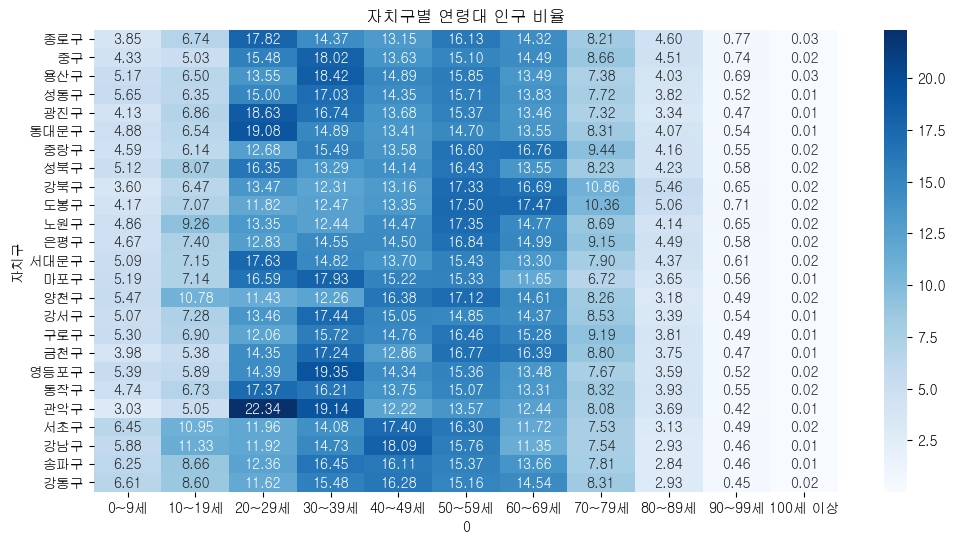

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (Windows 기준, 굴림)
plt.rcParams['font.family'] = 'Gulim'

plt.figure(figsize=(12,6))
sns.heatmap(df_grouped.set_index("자치구")[age_cols], cmap="Blues", annot=True, fmt=".2f")
plt.title("자치구별 연령대 인구 비율")
plt.show()

In [276]:
merge_data = df.merge(df_grouped[['자치구','최다연령대']], on='자치구',how='inner')

In [277]:
merge_data.drop(columns=['지역'], inplace=True)

지하철역이 근처에 있는가 접근성 탐지

In [278]:
subway = pd.read_csv("./data/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20241031.csv", encoding = 'cp949')

In [279]:
subway_1 = subway[['역명','위도','경도']]

In [280]:
import pandas as pd
from geopy.distance import distance

threshold = 1  #1km
results = []

for idx_s, row_s in close_school.iterrows():
    nearby_stations = []
    school_coord = (row_s['위도'], row_s['경도'])
    
    for idx_sub, row_sub in subway_1.iterrows():
        subway_coord = (row_sub['위도'], row_sub['경도'])
        dist_km = distance(school_coord, subway_coord).km
        if dist_km <= threshold:
            nearby_stations.append(row_sub['역명'])
    
    results.append({
        '폐교명': row_s['학교명'],
        '주변지하철': nearby_stations,
        '지하철개수': len(nearby_stations)
    })

nearby_df = pd.DataFrame(results)
nearby_df

,폐교명,주변지하철,지하철개수
0,서울논현초등학교,"[학동, 논현]",2
1,서울방현초등학교,"[방배, 사당, 사당]",3
2,서울우암초등학교,[],0
3,서울남천초등학교,[마천],1
4,서울상일초등학교,[],0
...,...,...,...
85,서울신창초등학교,[],0
86,서울용동초등학교,"[중계, 하계]",2
87,서울대은초등학교,"[연신내, 불광, 역촌, 불광, 독바위, 연신내, 구산]",7
88,서울광장초등학교,[광나루],1


In [281]:
merge_data = merge_data.rename(columns={'학교명':'폐교명'})

In [282]:
merge_data = merge_data.merge(nearby_df, on='폐교명',how = 'inner')
merge_data

,정보공시 학교코드,폐교명,위도,경도,자치구,최다연령대,주변지하철,지하철개수
0,S010000948,서울천일초등학교,37.544361,127.133439,강동구,40~49세,"[강동, 길동, 굽은다리, 암사]",4
1,S010001208,서울금천초등학교,37.454978,126.912769,금천구,30~39세,[],0
2,S010001218,서울도신초등학교,37.499269,126.900713,영등포구,30~39세,"[대림, 신풍, 대림]",3
3,S010001405,서울면북초등학교,37.594418,127.103549,중랑구,60~69세,[],0
4,S010001429,서울중흥초등학교,37.601674,127.084144,중랑구,60~69세,"[중화, 상봉]",2
5,S010001591,서울본동초등학교,37.509926,126.953853,동작구,20~29세,[상도],1
6,S010001605,서울원당초등학교,37.481279,126.956250,관악구,20~29세,"[낙성대, 서울대입구]",2
7,S010001759,서울신계초등학교,37.630500,127.052900,노원구,50~59세,[],0
8,S010001780,서울중현초등학교,37.632410,127.066432,노원구,50~59세,"[하계, 공릉]",2
9,S010001979,서울망원초등학교,37.560890,126.900762,마포구,30~39세,"[월드컵경기장, 마포구청, 망원]",3


In [283]:
merge_data = merge_data.drop(columns=['주변지하철'])

In [284]:
merge_data

,정보공시 학교코드,폐교명,위도,경도,자치구,최다연령대,지하철개수
0,S010000948,서울천일초등학교,37.544361,127.133439,강동구,40~49세,4
1,S010001208,서울금천초등학교,37.454978,126.912769,금천구,30~39세,0
2,S010001218,서울도신초등학교,37.499269,126.900713,영등포구,30~39세,3
3,S010001405,서울면북초등학교,37.594418,127.103549,중랑구,60~69세,0
4,S010001429,서울중흥초등학교,37.601674,127.084144,중랑구,60~69세,2
5,S010001591,서울본동초등학교,37.509926,126.953853,동작구,20~29세,1
6,S010001605,서울원당초등학교,37.481279,126.956250,관악구,20~29세,2
7,S010001759,서울신계초등학교,37.630500,127.052900,노원구,50~59세,0
8,S010001780,서울중현초등학교,37.632410,127.066432,노원구,50~59세,2
9,S010001979,서울망원초등학교,37.560890,126.900762,마포구,30~39세,3


In [285]:
potal = pd.read_csv("./data/서울시 평생학습포털 평생교육기관 현황.csv", encoding = 'cp949')

In [286]:
potal["자치구"] = potal["기관주소"].str.extract(r'(\S+구)')

In [287]:
# '구' 컬럼이 NaN인 행 삭제
potal.dropna(subset=['자치구'], inplace=True)

In [288]:
potal.columns

Index(['기관명', '기관연락처', '기관주소', '홈페이지', '위치(위도)', '위치(경도)', '자치구'], dtype='object')

In [289]:
potal_1 = potal[['자치구','기관명']]

In [290]:
potal_1['평생교육원개수'] = potal_1.groupby('자치구')['기관명'].count()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23840\3862385668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potal_1['평생교육원개수'] = potal_1.groupby('자치구')['기관명'].count()


In [291]:
gu_counts = potal_1.groupby('자치구')['기관명'].count().reset_index()

In [292]:
gu_counts.rename(columns={'기관명': '평생교육원기관수'}, inplace=True)

# 2. merge_date에 자치구 기준으로 병합
merge_data = merge_data.merge(gu_counts, on='자치구', how='inner')

In [293]:
merge_data

,정보공시 학교코드,폐교명,위도,경도,자치구,최다연령대,지하철개수,평생교육원기관수
0,S010000948,서울천일초등학교,37.544361,127.133439,강동구,40~49세,4,5
1,S010001208,서울금천초등학교,37.454978,126.912769,금천구,30~39세,0,4
2,S010001218,서울도신초등학교,37.499269,126.900713,영등포구,30~39세,3,1
3,S010001405,서울면북초등학교,37.594418,127.103549,중랑구,60~69세,0,1
4,S010001429,서울중흥초등학교,37.601674,127.084144,중랑구,60~69세,2,1
5,S010001591,서울본동초등학교,37.509926,126.953853,동작구,20~29세,1,4
6,S010001605,서울원당초등학교,37.481279,126.956250,관악구,20~29세,2,2
7,S010001759,서울신계초등학교,37.630500,127.052900,노원구,50~59세,0,6
8,S010001780,서울중현초등학교,37.632410,127.066432,노원구,50~59세,2,6
9,S010001979,서울망원초등학교,37.560890,126.900762,마포구,30~39세,3,4


In [294]:
info = pd.read_csv("./data/서울시 지역아동센터 시설현황정보.csv", encoding = 'cp949')

In [295]:
info_1 = info[['시설명','자치구명']]
info_1

,시설명,자치구명
0,고척재미난지역아동센터,구로구
1,한울지역아동센터,영등포구
2,진성지역아동센터,광진구
3,테스트지역아동센터,강남구
4,봄이랑지역아동센터,중랑구
...,...,...
406,한사랑지역아동센터,금천구
407,금강지역아동센터,구로구
408,하모니지역아동센터,구로구
409,강남지역아동센터,강남구


In [296]:
info_1 = info_1.rename(columns={'자치구명':'자치구'})
info_counts = info_1.groupby('자치구')['시설명'].count().reset_index()

In [297]:
info_counts.rename(columns={'시설명': '아동센터시설수'}, inplace=True)

# 2. merge_date에 자치구 기준으로 병합
merge_data = merge_data.merge(info_counts, on='자치구', how='inner')

In [298]:
merge_data

,정보공시 학교코드,폐교명,위도,경도,자치구,최다연령대,지하철개수,평생교육원기관수,아동센터시설수
0,S010000948,서울천일초등학교,37.544361,127.133439,강동구,40~49세,4,5,25
1,S010001208,서울금천초등학교,37.454978,126.912769,금천구,30~39세,0,4,25
2,S010001218,서울도신초등학교,37.499269,126.900713,영등포구,30~39세,3,1,18
3,S010001405,서울면북초등학교,37.594418,127.103549,중랑구,60~69세,0,1,23
4,S010001429,서울중흥초등학교,37.601674,127.084144,중랑구,60~69세,2,1,23
5,S010001591,서울본동초등학교,37.509926,126.953853,동작구,20~29세,1,4,21
6,S010001605,서울원당초등학교,37.481279,126.956250,관악구,20~29세,2,2,25
7,S010001759,서울신계초등학교,37.630500,127.052900,노원구,50~59세,0,6,22
8,S010001780,서울중현초등학교,37.632410,127.066432,노원구,50~59세,2,6,22
9,S010001979,서울망원초등학교,37.560890,126.900762,마포구,30~39세,3,4,10


In [299]:
# 노인
noin_data = pd.read_csv("./data/노인여가+복지시설(동별)_20250914134109.csv",encoding='cp949')
noin_data

,동별(1),동별(2),동별(3),2022,2022.1,2022.2,2022.3
0,동별(1),동별(2),동별(3),시설합계 (개소),노인복지관,경로당 (개소),노인교실 (개소)
1,동별(1),동별(2),동별(3),소계,시설수 (개소),소계,소계
2,합계,소계,소계,3920,88,3490,342
3,합계,종로구,소계,74,3,62,9
4,합계,종로구,사직동,...,...,...,...
...,...,...,...,...,...,...,...
449,합계,강동구,천호2동,...,1,...,...
450,합계,강동구,길동,...,-,...,...
451,합계,강동구,강일동,...,-,...,...
452,합계,강동구,상일1동,...,-,...,...


In [300]:
noin_data.columns = noin_data.iloc[0]

In [301]:
noin_data.iloc[3:]

,동별(1),동별(2),동별(3),시설합계 (개소),노인복지관,경로당 (개소),노인교실 (개소)
3,합계,종로구,소계,74,3,62,9
4,합계,종로구,사직동,...,...,...,...
5,합계,종로구,삼청동,...,...,...,...
6,합계,종로구,부암동,...,...,...,...
7,합계,종로구,평창동,...,...,...,...
...,...,...,...,...,...,...,...
449,합계,강동구,천호2동,...,1,...,...
450,합계,강동구,길동,...,-,...,...
451,합계,강동구,강일동,...,-,...,...
452,합계,강동구,상일1동,...,-,...,...


In [302]:
noin_data['동별(2)'].unique()

array(['동별(2)', '소계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구',
       '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구',
       '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [303]:
gu = ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구',
       '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구',
       '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구']

result = noin_data[
    (noin_data['동별(2)'].isin(gu)) &
    (noin_data['동별(3)'] == '소계')
]

result = result.drop(columns=['동별(1)','동별(3)'])
result = result.rename(columns={'동별(2)':'자치구'})

In [304]:
result = result[['자치구','노인복지관']]

In [305]:
merge_data = merge_data.merge(result, on = '자치구', how= 'inner')
merge_data.columns

Index(['정보공시 학교코드', '폐교명', '위도', '경도', '자치구', '최다연령대', '지하철개수', '평생교육원기관수',
       '아동센터시설수', '노인복지관'],
      dtype='object')

In [306]:
merge_data

,정보공시 학교코드,폐교명,위도,경도,자치구,최다연령대,지하철개수,평생교육원기관수,아동센터시설수,노인복지관
0,S010000948,서울천일초등학교,37.544361,127.133439,강동구,40~49세,4,5,25,3
1,S010001208,서울금천초등학교,37.454978,126.912769,금천구,30~39세,0,4,25,4
2,S010001218,서울도신초등학교,37.499269,126.900713,영등포구,30~39세,3,1,18,3
3,S010001405,서울면북초등학교,37.594418,127.103549,중랑구,60~69세,0,1,23,5
4,S010001429,서울중흥초등학교,37.601674,127.084144,중랑구,60~69세,2,1,23,5
5,S010001591,서울본동초등학교,37.509926,126.953853,동작구,20~29세,1,4,21,3
6,S010001605,서울원당초등학교,37.481279,126.956250,관악구,20~29세,2,2,25,1
7,S010001759,서울신계초등학교,37.630500,127.052900,노원구,50~59세,0,6,22,3
8,S010001780,서울중현초등학교,37.632410,127.066432,노원구,50~59세,2,6,22,3
9,S010001979,서울망원초등학교,37.560890,126.900762,마포구,30~39세,3,4,10,4


In [307]:
merge_data.columns

Index(['정보공시 학교코드', '폐교명', '위도', '경도', '자치구', '최다연령대', '지하철개수', '평생교육원기관수',
       '아동센터시설수', '노인복지관'],
      dtype='object')

폐교 활용 예시:

아동·청소년 교육 시설 → 아동센터, 방과후 교실 등

성인 교육·평생교육 시설 → 평생교육원, 직업훈련원

노인 복지·문화 공간 → 노인복지관, 경로당, 건강 프로그램

In [308]:
merge_data['노인복지관'] = merge_data['노인복지관'].astype(int)

In [309]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   정보공시 학교코드  41 non-null     object 
 1   폐교명        41 non-null     object 
 2   위도         41 non-null     float64
 3   경도         41 non-null     float64
 4   자치구        41 non-null     object 
 5   최다연령대      41 non-null     object 
 6   지하철개수      41 non-null     int64  
 7   평생교육원기관수   41 non-null     int64  
 8   아동센터시설수    41 non-null     int64  
 9   노인복지관      41 non-null     int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 3.3+ KB


In [310]:
healthy = pd.read_csv("./data/서울시 건강증진센터(표준 데이터).csv", encoding = 'cp949')
healthy['자치구'] = healthy['소재지도로명주소'].str.split().str[1]
healthy

,건강증진센터명,건강증진센터구분,소재지도로명주소,소재지지번주소,위도,경도,건강증진업무내용,운영시작시각,운영종료시각,휴무일정보,...,기타이용안내,운영기관전화번호,운영기관명,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명,작업일시,자치구
0,광진구정신건강복지센터,정신보건,"서울특별시 광진구 긴고랑로 110, 4층","서울특별시 광진구 중곡동 125-11, 4층",37.559338,127.087091,중증정신질환자 등록 사례관리 및 재활프로그램운영+생애주기별 정신건강사업+정신건강상담...,09:00,18:00,토+일+공휴일,...,NaN,02-450-1895,멘토스병원,02-450-1934,서울특별시 광진구 보건소,2025-07-28,3040000,서울특별시 광진구,2025-09-01 15:12:52.0,광진구
1,은평구정신건강복지센터,정신보건,서울특별시 은평구 연서로 34길 11,서울특별시 은평구 불광동 130-2,37.621569,126.927620,"정신건강 교육 및 홍보, 고위험군 발견 및 연계, 전문 상담 및 관리",09:00,18:00,법정 공휴일,...,NaN,02-356-8683,서울특별시 은평구 보건소,02-351-8682,서울특별시 은평구 보건소,2025-06-26,3110000,서울특별시 은평구,2025-09-01 15:12:52.0,은평구
2,정신건강복지센터,정신보건,서울특별시 종로구 성균관로15길 10,서울특별시 종로구 명륜1가 5-14,37.590054,126.997615,정신건강증진사업,09:00,18:00,매주 토요일+일요일+공휴일,...,방문상담시 사전예약,02-745-0199,정신건강복지센터,02-2148-3602,서울특별시 종로구 보건소,2025-06-23,3000000,서울특별시 종로구,2025-09-01 15:12:52.0,종로구
3,4권역 건강이랑서비스센터(구. 명륜건강증진센터),건강증진,서울특별시 종로구 성균관로1길 6-3,서울특별시 종로구 명륜3가 147-1,37.583405,126.997766,"고혈압, 당뇨 등 일차진료 및 처방",09:00,18:00,매주 토요일+일요일+공휴일,...,검사 전날 밤 10시부터 금식 요망,02-2148-3735,명륜건강증진센터,02-2148-3735,서울특별시 종로구 보건소,2025-06-23,3000000,서울특별시 종로구,2025-09-01 15:12:52.0,종로구
4,서울특별시 구로정신건강복지센터,정신보건,서울특별시 구로구 공원로21,NaN,37.498926,126.891276,정신건강증진사업+아동청소년사업+자살예방사업+중증정신질환사업+심리상담실 운영,09:00,18:00,토+일+공휴일,...,NaN,02-861-2284,서울특별시 구로구 보건소,02-860-2615,서울특별시 구로구 보건소,2025-04-10,3160000,서울특별시 구로구,2025-09-01 15:12:52.0,구로구
5,동작구정신건강복지센터,정신보건,서울특별시 동작구 사당로 253-3,서울특별시 동작구 사당동 324-14,37.483674,126.975872,정신질환자 조기발견 및 관리,09:00,17:00,토+일+공휴일,...,상담 원할시 사전 전화연락 요망,02-820-4072,동작구보건소,02-820-1425,서울특별시 동작구 보건소,2025-04-05,3190000,서울특별시 동작구,2025-09-01 15:12:52.0,동작구
6,수서동건강증진센터,건강증진,서울특별시 강남구 밤고개로1길 52,서울특별시 강남구 수서동718,37.489001,127.105274,"대사증후군관리,만성질환관리,고혈압,당뇨 교육",09:00,18:00,토+일+공휴일,...,검사전날밤10시부터 금식 요망,02-3423-8773,강남구 보건소,02-3423-7134,강남구 보건소,2025-03-16,3220000,서울특별시 강남구,2025-09-01 15:12:52.0,강남구
7,세곡동건강증진센터,건강증진,서울특별시 강남구 밤고개로 286,서울특별시 강남구 율현동 278-1,37.469009,127.106904,"대사증후군관리,만성질환관리,고혈압,당뇨 교육",09:00,17:00,월+수~일+공휴일,...,검사전날밤11시부터 금식 요망,02-3423-8688,강남구 보건소,02-3423-7134,강남구 보건소,2025-03-16,3220000,서울특별시 강남구,2025-09-01 15:12:52.0,강남구
8,강서구정신건강복지센터,정신보건,"서울특별시 강서구 공항대로 561, B1층","서울특별시 강서구 염창동 275-12, B1층",37.549650,126.868280,"중증정신질환관리, 정신건강상담, 자살예방, 알코올중독예방 등",09:00,18:00,매주토요일+매주일요일+공휴일,...,상담 전 예약 요망,02-2600-5926,아름다운미래의원,02-2600-5271,서울특별시 강서구청,2025-02-11,3150000,서울특별시 강서구,2025-09-01 15:12:52.0,강서구
9,성북구정신건강복지센터,정신보건,서울특별시 성북구 화랑로 63,서울특별시 성북구 하월곡동 46-1,37.602711,127.039533,중증정신질환자관리+아동청소년정신건강관리+우울자살예방+알코올중독관리 및 예방+정신건강...,09:00,18:00,토+일+공휴일,...,사전 전화 예약 후 상담,02-2241-6314,서울특별시 성북구보건소,02-2241-6133,성북구보건소,2025-02-05,3070000,서울특별시 성북구,2025-09-01 15:12:52.0,성북구


In [311]:
healthy.columns

Index(['건강증진센터명', '건강증진센터구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '건강증진업무내용',
       '운영시작시각', '운영종료시각', '휴무일정보', '건물면적', '의사수', '간호사수', '사회복지사수', '영양사수',
       '기타인력현황', '기타이용안내', '운영기관전화번호', '운영기관명', '관리기관전화번호', '관리기관명', '데이터기준일자',
       '제공기관코드', '제공기관명', '작업일시', '자치구'],
      dtype='object')

In [312]:
healthy_data = healthy[['건강증진센터명','자치구']]
healthy_data.groupby('자치구')['건강증진센터명'].count()

자치구
강남구     2
강동구     1
강북구     1
강서구     1
관악구     1
광진구     1
구로구     1
금천구     1
노원구     7
동작구     1
서대문구    1
성동구     1
성북구     1
송파구     2
양천구     1
영등포구    1
용산구     2
은평구     1
종로구     2
중구      1
중랑구     1
Name: 건강증진센터명, dtype: int64

In [313]:
healthy_data = healthy_data.groupby('자치구')['건강증진센터명'].count().reset_index()
healthy_data.rename(columns={'건강증진센터명': '건강증진센터수'}, inplace=True)

# 2. merge_date에 자치구 기준으로 병합
merge_data = merge_data.merge(healthy_data, on='자치구', how='inner')

In [314]:
merge_data

,정보공시 학교코드,폐교명,위도,경도,자치구,최다연령대,지하철개수,평생교육원기관수,아동센터시설수,노인복지관,건강증진센터수
0,S010000948,서울천일초등학교,37.544361,127.133439,강동구,40~49세,4,5,25,3,1
1,S010001208,서울금천초등학교,37.454978,126.912769,금천구,30~39세,0,4,25,4,1
2,S010001218,서울도신초등학교,37.499269,126.900713,영등포구,30~39세,3,1,18,3,1
3,S010001405,서울면북초등학교,37.594418,127.103549,중랑구,60~69세,0,1,23,5,1
4,S010001429,서울중흥초등학교,37.601674,127.084144,중랑구,60~69세,2,1,23,5,1
5,S010001591,서울본동초등학교,37.509926,126.953853,동작구,20~29세,1,4,21,3,1
6,S010001605,서울원당초등학교,37.481279,126.956250,관악구,20~29세,2,2,25,1,1
7,S010001759,서울신계초등학교,37.630500,127.052900,노원구,50~59세,0,6,22,3,7
8,S010001780,서울중현초등학교,37.632410,127.066432,노원구,50~59세,2,6,22,3,7
9,S010002183,서울양남초등학교,37.533600,127.089500,광진구,20~29세,2,2,13,1,1


In [317]:
df_1 = pd.read_csv("./data/서울시 공공체육시설 정보.csv", encoding = 'cp949')
df_1.columns

Index(['체육시설일련번호', '자치구', '시설명', '시설유형', '시설우편번호', '시설주소', '시설상세주소', '시설규모',
       '운영기관', '연락처', '운영시간_평일', '운영시간_주말', '운영시간_공휴일', '시설대관여부', '시설사용료',
       '주차정보', '홈페이지', '시설종류', '시설운영상태', '시설편의시설', '비고'],
      dtype='object')

In [321]:
df_1['자치구'] = df_1['자치구'] + '구'

In [323]:
df_1[['자치구','시설명']].groupby('자치구')['시설명'].count()

자치구
강남구     43
강동구     44
강북구     18
강서구     49
관악구     27
광진구     45
구로구     46
금천구     23
노원구     49
도봉구     27
동대문구    22
동작구     30
마포구     44
서대문구    22
서초구     59
성동구     45
성북구     29
송파구     56
양천구     40
영등포구    41
용산구     40
은평구     30
종로구     19
중구구     23
중랑구     26
Name: 시설명, dtype: int64

In [324]:
df_1 = df_1.groupby('자치구')['시설명'].count().reset_index()
df_1.rename(columns={'시설명': '체육시설수'}, inplace=True)

# 2. merge_date에 자치구 기준으로 병합
merge_data = merge_data.merge(df_1, on='자치구', how='inner')

In [326]:
merge_data.columns

Index(['정보공시 학교코드', '폐교명', '위도', '경도', '자치구', '최다연령대', '지하철개수', '평생교육원기관수',
       '아동센터시설수', '노인복지관', '건강증진센터수', '체육시설수'],
      dtype='object')

In [327]:
merge_data.to_csv('폐교학교활용.csv',index=False)